In [ ]:
import numpy as np     
import pandas as pd   # data manupulation
import matplotlib.pyplot as plt       #data visualisation graph,etc
import seaborn as sns           # same as matplotlib
import sklearn              #  for train test split

In [ ]:
placement=pd.read_csv('/content/Placement_Data_Full_Class.csv')

In [ ]:
placement.head()     # to examine the dataset or print first 5 rows

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
placement_copy=placement.copy()

In [ ]:
#placement_copy['gender'].replace({'M':'1' , 'F':'0'},inplace=True)

In [ ]:
placement_copy.shape     # dataset has 215 rows and 15 columns

(215, 15)

In [ ]:
placement_copy.dtypes            # to showcase the datatypes of  columns

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [ ]:
placement_copy.isnull().sum()    # except salary column none of te column has NaN values

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
placement_copy['salary'].fillna(value = 0 , inplace = True)

In [ ]:
#NAN HANDLING
placement_copy.isnull().sum()     # now we have 0 null  values in salary column

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1 , inplace = True)     # axis = 1 for columns , axis=0 for rows  remove unwanted rows

In [ ]:
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Employability Percentage')

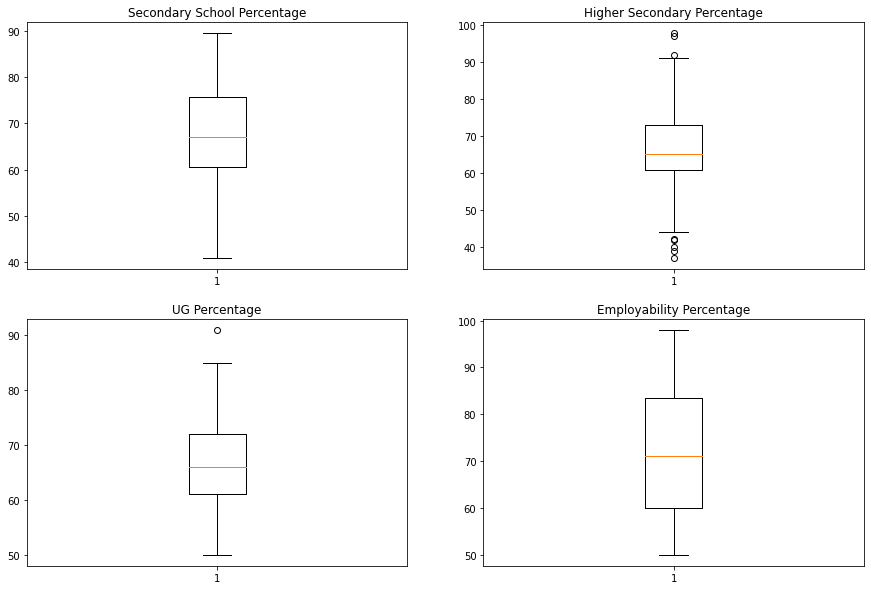

In [ ]:
#OUTLIER HANDLING

plt.figure(figsize=(15,10))    # size of graph
ax=plt.subplot(221)           # 221 means it will create 2*2 graph pointing towards 1
plt.boxplot(placement_copy['ssc_p'])     
ax.set_title('Secondary School Percentage')  


ax=plt.subplot(222)           # 221 means it will create 2*2 graph pointing towards 2
plt.boxplot(placement_copy['hsc_p'])     
ax.set_title('Higher Secondary Percentage')


ax=plt.subplot(223)           # 221 means it will create 2*2 graph pointing towards 3
plt.boxplot(placement_copy['degree_p'])     
ax.set_title('UG Percentage')


ax=plt.subplot(224)           # 221 means it will create 2*2 graph pointing towards 4
plt.boxplot(placement_copy['etest_p'])     
ax.set_title('Employability Percentage')


#we have outlines in hsc_p (multiple outines) and degree_p ( single)

In [ ]:
Q1=placement_copy['hsc_p'].quantile(0.25)
Q3=placement_copy['hsc_p'].quantile(0.75)
IQR=Q3-Q1     #Inter qunatile range

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p'] <= Q3 + 1.5 * IQR)
placement_filtered = placement_copy.loc[filter]

{'boxes': [<matplotlib.lines.Line2D at 0x7f8ae2118350>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8ade358390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8ade3625d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8ade362450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8ade3f3dd0>,
  <matplotlib.lines.Line2D at 0x7f8ade411490>]}

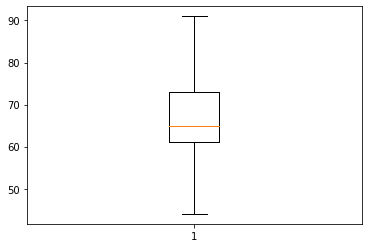

In [ ]:
plt.boxplot(placement_filtered['hsc_p'])

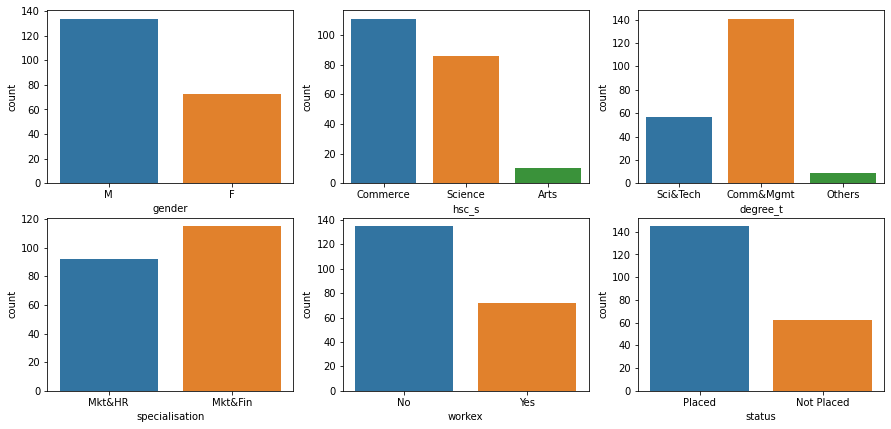

In [ ]:
#DATA VISUALIZAION
plt.figure(figsize = (15,7))
plt.subplot(231)
ax =  sns.countplot(x = 'gender' , data = placement_filtered) 

plt.subplot(232)
ax =  sns.countplot(x = 'hsc_s' , data = placement_filtered)

plt.subplot(233)
ax =  sns.countplot(x = 'degree_t' , data = placement_filtered)

plt.subplot(234)
ax =  sns.countplot(x = 'specialisation' , data = placement_filtered)

plt.subplot(235)
ax =  sns.countplot(x = 'workex' , data = placement_filtered)

plt.subplot(236)
ax =  sns.countplot(x = 'status' , data = placement_filtered)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


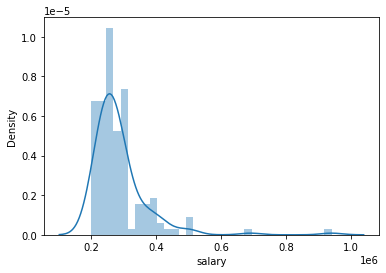

In [ ]:
placement_placed=placement_filtered[placement_filtered.salary!=0]    #filter out the data that has been placed  or make distribution plot
sns.distplot(placement_placed['salary'])

In [ ]:
# import plotly_express as px
#px.violin(placement_placed, y = 'salary', x= 'specialisation' ,color='gender' , box = True , ponts = "all")

In [ ]:
#ENCODING

# label encoding - to convert strings to integers 
from sklearn.preprocessing import LabelEncoder      # library for preprocessing of data

object_cols = ['gender','workex', 'specialisation', 'status']
label_encoder = LabelEncoder()              # make object of class LabelEncoder
for col in object_cols:
  placement_filtered[col] = label_encoder.fit_transform(placement_filtered[col])
placement_filtered.head()
    # converted into 0 and 1 form

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [ ]:
# One Hot Encoding                                 #create dummies of rows 
#in dummy hot encoding , each and every class under rows get separated by dummy columns
dummy_hsc_s=pd.get_dummies(placement_filtered['hsc_s'], prefix='dummy')    #creating dummy columns for the entries in hsc_s column
dummy_degree_t=pd.get_dummies(placement_filtered['degree_t'],prefix = 'dummy')    #creating dummy columns for the entries in degree_t columns
placement_coded=pd.concat([placement_filtered, dummy_hsc_s, dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1,inplace=True)       #droppinng the redundant columns
placement_coded.head()


,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [ ]:
#DATA SPLITTING

X=placement_coded.drop(['status'],axis=1)   #we are passing these datasets into the frame except status column as we have to predict that particular value so we are dropping that column
Y = placement_coded.status        #in y , the status column will be going as we have to predict that value as if the student is placed or not


In [ ]:
#train test split         train_size > test_size
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,train_size=0.8, random_state=1)   #random_state is not there then a difft. portion of data will be tested

In [ ]:
#CLASSIFICATION MODELS
X

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,0,91.0,0,74.49,0,1,0,1,0,0
211,1,58.00,60.00,72.00,0,74.0,0,53.62,0,0,1,0,0,1
212,1,67.00,67.00,73.00,1,59.0,0,69.72,0,1,0,1,0,0
213,0,74.00,66.00,58.00,0,70.0,1,60.23,0,1,0,1,0,0


In [ ]:
#Logistic Regression  - statistical method or probability method to find the prediction
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()   #creating an object of class logistic regression 

logreg.fit(X_train , Y_train)     #fitting xtrain and y train   
Y_pred = logreg.predict(X_test)
print(logreg.score(X_test , Y_test))       # we are using logistic regression to find the accuracy whether the person is placed or not
                                            #the accuracy of our model is 80.9%


0.8095238095238095


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#DECISION TREE CLASSIFIER
# we are going to use decision tree - a classification model that uses tree like structures to represent its possible consequences 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)
dt = dt.fit(X_train , Y_train)
Y_pred = dt.predict(X_test)
print("Accuracy",metrics.accuracy_score(Y_test,Y_pred))

Accuracy 0.7380952380952381


In [ ]:
#RANDOM FOREST CLASSIFIER
# - bunch of decision trees that make up a forest , used for the classification of regression models
from sklearn.ensemble import RandomForestClassifier 
rt = RandomForestClassifier(n_estimators = 100)
rt.fit(X_train , Y_train)
Y_pred = rt.predict(X_test)
print("Accuracy",metrics.accuracy_score(Y_test,Y_pred))

Accuracy 0.7857142857142857


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pred=logreg.predict(X_test)
print("MAE: ",(metrics.mean_absolute_error(pred,Y_test)))
print("MSE: ",(metrics.mean_squared_error(pred,Y_test)))
print("R2 score: ",(metrics.r2_score(pred, Y_test)))
  #MSE and MAE are used to determine how close the predicted values are to be actual values 
  #Lower error value indicates better fitting model
  # R2 score is the indication of how well model fits the data 

MAE:  0.19047619047619047
MSE:  0.19047619047619047
R2 score:  -0.13131313131313127


In [ ]:
#sns.regplot(x=pred , y=Y_test)
#plt.xlabel("Predicted Placement Status")
#plt.ylabel("Actual Placement Status")
#plt.title("Actual v/s Predicted Palcement Status")
#plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from numpy import asarray
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()
input_data = (1,89.50,98.00,33.22,0,85.00,1,53.00,1,0,1,0,0,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
print(std_data)
prediction=rt.predict(std_data)
print(prediction)

if prediction==0:
  print('sorry,the student is not placed')
else:
  print('student is placed')


[[ 0.73808951  2.06395457  3.25391107 -4.56844703 -0.73029674  1.00950546
   1.11803399 -1.62151561  4.4384682  -1.07529066  1.18616051 -1.46163047
  -0.21320072 -0.6164414 ]]
[0]
sorry,the student is not placed


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
